In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap



In [23]:
# file name = binned_SFHs-7levels-JWST_z_0.5-1.0
file = "data/binned_SFHs-7levels-JWST_z_0.5-1.0.txt"
df = pd.read_csv(file,sep='\t')
df
levels=df.columns[2:8]
SFH_lev=df[levels].values
print(df.head())

   id_L19         z   level_0   level_1   level_2   level_3   level_4  \
0     1.0  0.999855  0.972084  0.947799  0.614903  0.955118  1.233075   
1     2.0  0.999877  0.731829  0.752371  0.696417  0.751243  1.078478   
2     3.0  0.999962  0.185444  0.304448  0.257010  0.187302  0.359714   
3     4.0  0.999992  0.990093  0.869858  0.864553  1.118764  1.872074   
4     5.0  0.999904  0.088227  0.144837  0.085377  0.146562  0.200182   

    level_5  bins_0  bins_1  bins_2  bins_3  bins_4  bins_5  bins_6  
0  2.105449     0.0    30.0    84.0   236.0   660.0  1850.0  5185.0  
1  0.461603     0.0    30.0    83.0   230.0   637.0  1766.0  4890.0  
2  0.173263     0.0    30.0    82.0   224.0   612.0  1672.0  4569.0  
3  1.487741     0.0    30.0    84.0   233.0   648.0  1806.0  5029.0  
4  0.251729     0.0    30.0    83.0   231.0   643.0  1785.0  4958.0  


In [16]:
seed = 0

X_train = SFH_lev

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Reshape the data to 2D
n_samples, sz, d = X_train.shape
X_train_2d = X_train.reshape((n_samples, sz * d))


Euclidean k-means


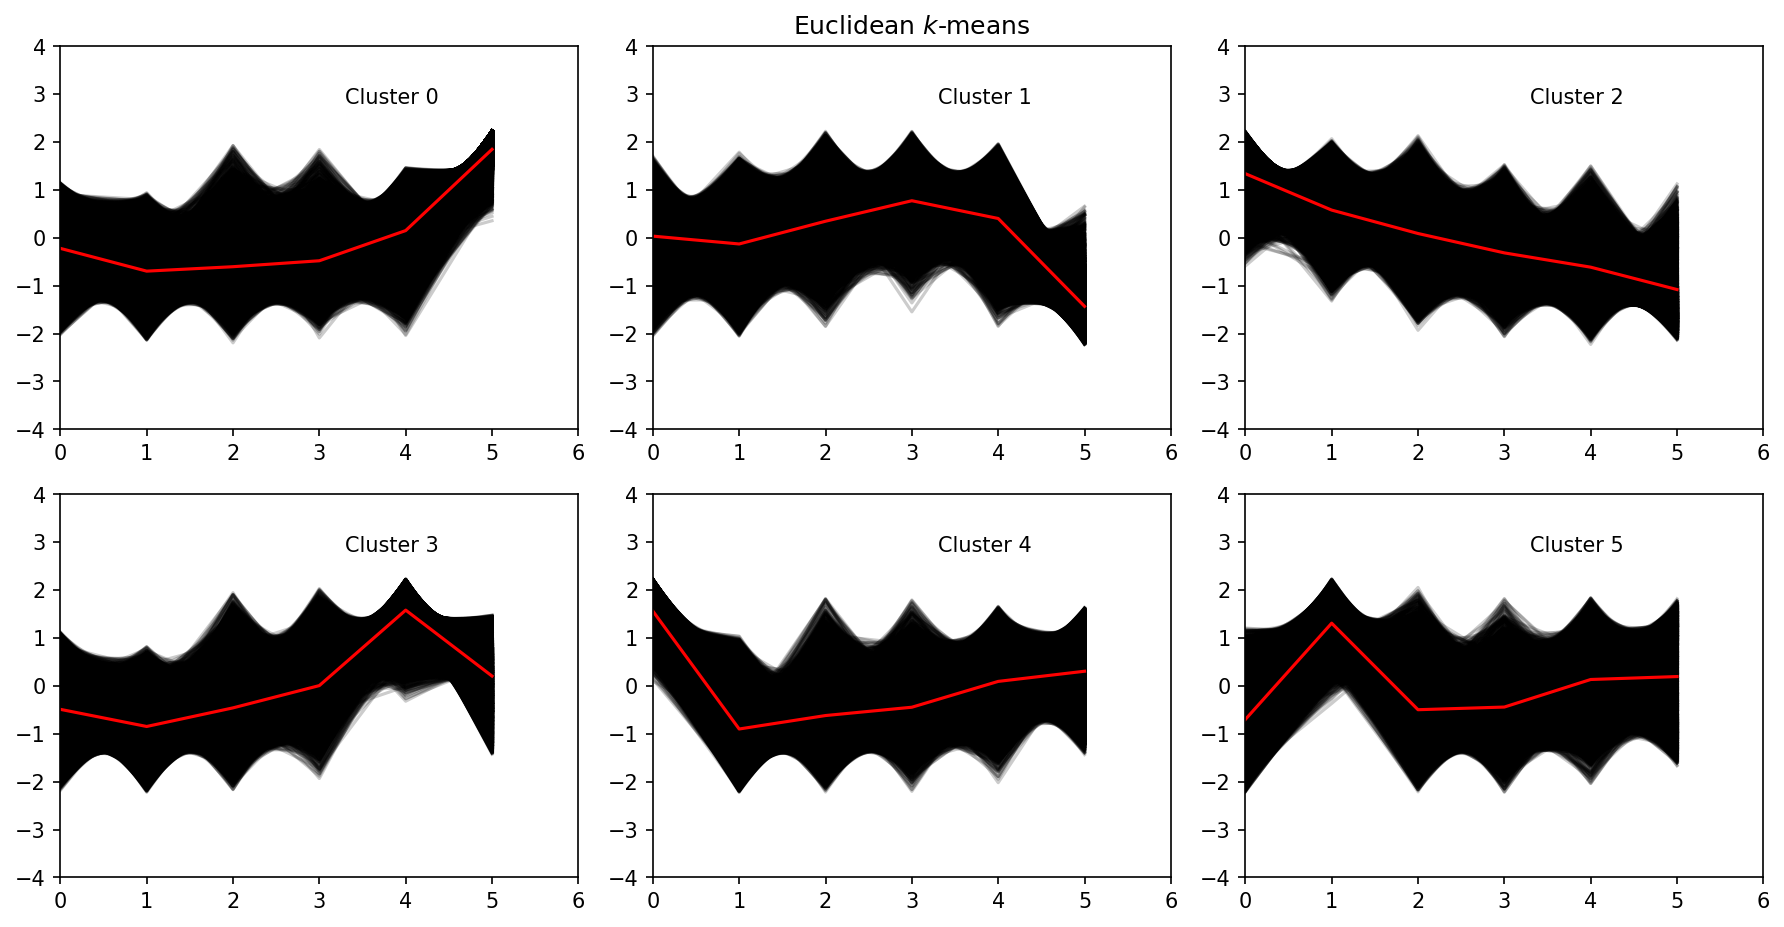

In [21]:
# Euclidean k-means
print("Euclidean k-means")
km = KMeans(n_clusters=6, random_state=seed, n_init="auto")
y_pred = km.fit_predict(X_train_2d)

# Reshape cluster centers back to 3D
cluster_centers_3d = km.cluster_centers_.reshape((6, sz, d))

plt.figure(figsize=(12, 18), dpi=150)  # Increase the figure size and dpi

for yi in range(6):
    plt.subplot(6, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi), transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()



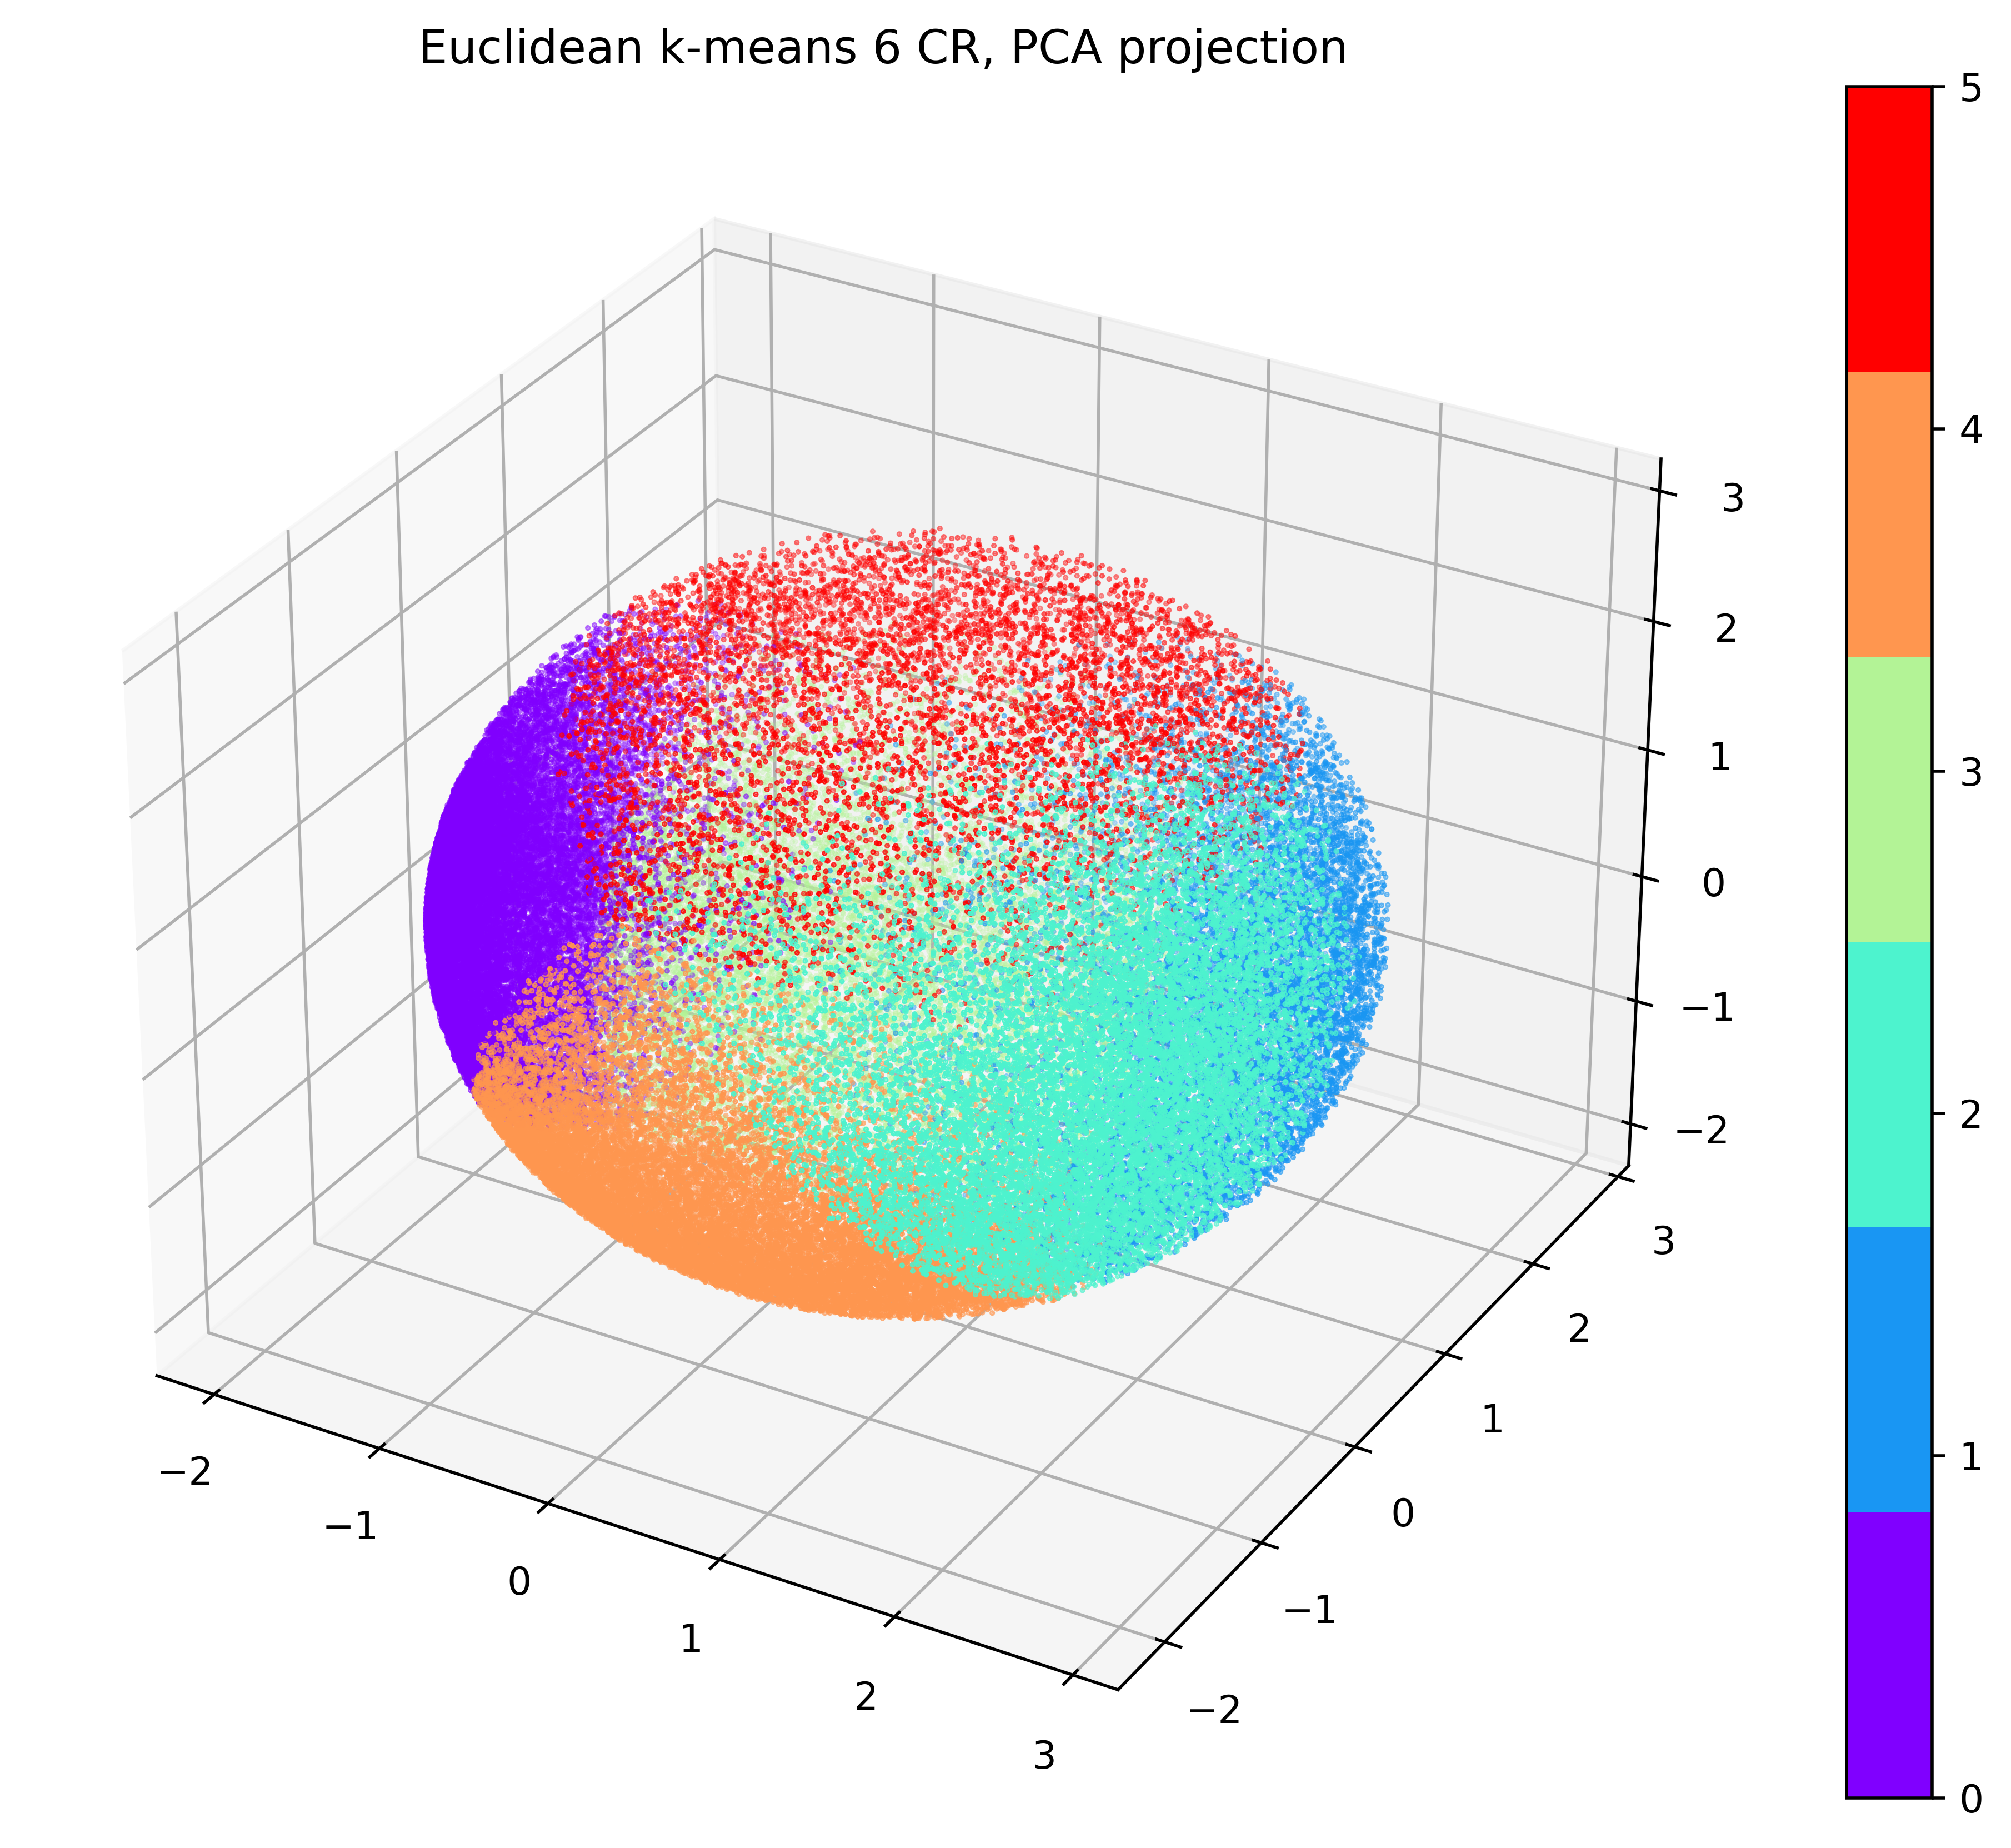

In [22]:


# project to 3D for plotting
pca = PCA(n_components=3)
X_train_3d = pca.fit_transform(X_train_2d)

unique_labels = np.unique(y_pred)
num_labels = len(unique_labels)
colors = cm.rainbow(np.linspace(0, 1, num_labels))
cmap = ListedColormap(colors)

# Increase the resolution
fig = plt.figure(figsize=(10, 8), dpi=500)
ax = fig.add_subplot(111, projection='3d')

# plot data
scatter = ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], X_train_3d[:, 2], c=y_pred, cmap=cmap, s=0.2)

# Set plot title
ax.set_title('Euclidean k-means 6 CR, PCA projection')

# Add colorbar
cbar = fig.colorbar(scatter)

# Display the plot
plt.show()


In [28]:
import pandas as pd

# Your existing code...

# Create a new DataFrame to store the desired information
result_df = pd.DataFrame(columns=['id', 'PCA_projection_X', 'PCA_projection_Y', 'PCA_projection_Z', 'cluster'])

# Populate the DataFrame with the information for all rows in X_train
for i in range(len(X_train_3d)):
    galaxy_id = df.loc[i, 'id_L19']
    x, y, z = X_train_3d[i]
    cluster = y_pred[i]
    result_df.loc[i] = [galaxy_id, x, y, z, cluster]

    # Display the progress after every 100 iterations
    if i % 100 == 0:
        print(f"Processed {i} rows")

# Display the resulting DataFrame
display(result_df.head())

display(result_df.info())

display(result_df.describe())


Processed 0 rows
Processed 100 rows
Processed 200 rows
Processed 300 rows
Processed 400 rows
Processed 500 rows
Processed 600 rows
Processed 700 rows
Processed 800 rows
Processed 900 rows
Processed 1000 rows
Processed 1100 rows
Processed 1200 rows
Processed 1300 rows
Processed 1400 rows
Processed 1500 rows
Processed 1600 rows
Processed 1700 rows
Processed 1800 rows
Processed 1900 rows
Processed 2000 rows
Processed 2100 rows
Processed 2200 rows
Processed 2300 rows
Processed 2400 rows
Processed 2500 rows
Processed 2600 rows
Processed 2700 rows
Processed 2800 rows
Processed 2900 rows
Processed 3000 rows
Processed 3100 rows
Processed 3200 rows
Processed 3300 rows
Processed 3400 rows
Processed 3500 rows
Processed 3600 rows
Processed 3700 rows
Processed 3800 rows
Processed 3900 rows
Processed 4000 rows
Processed 4100 rows
Processed 4200 rows
Processed 4300 rows
Processed 4400 rows
Processed 4500 rows
Processed 4600 rows
Processed 4700 rows
Processed 4800 rows
Processed 4900 rows
Processed 50

id  PCA_projection_X  PCA_projection_Y  PCA_projection_Z  cluster
0  1.0         -1.839338         -0.199802          0.518364      0.0
1  2.0          1.455483          1.744388         -0.699344      1.0
2  3.0          0.951062          1.938859          0.560835      5.0
3  4.0         -1.145422          1.189617         -0.806234      3.0
4  5.0         -1.747621          0.864934          0.588313      0.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91370 entries, 0 to 91369
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                91370 non-null  float64
 1   PCA_projection_X  91370 non-null  float64
 2   PCA_projection_Y  91370 non-null  float64
 3   PCA_projection_Z  91370 non-null  float64
 4   cluster           91370 non-null  float64
dtypes: float64(5)
memory usage: 4.2 MB


None

id  PCA_projection_X  PCA_projection_Y  PCA_projection_Z  \
count  91370.000000      9.137000e+04      9.137000e+04      9.137000e+04   
mean   48143.402638      1.275353e-15      3.962926e-15     -1.749333e-15   
std    27788.105334      1.481714e+00      1.121969e+00      9.727033e-01   
min        1.000000     -1.992994e+00     -2.114617e+00     -1.988426e+00   
25%    24102.250000     -1.423691e+00     -8.930986e-01     -7.593530e-01   
50%    48174.500000     -2.039903e-01     -1.279862e-01     -5.426631e-02   
75%    72382.750000      1.323275e+00      8.332806e-01      6.618572e-01   
max    96088.000000      2.894248e+00      2.772326e+00      2.885914e+00   

            cluster  
count  91370.000000  
mean       2.016417  
std        1.718999  
min        0.000000  
25%        0.000000  
50%        2.000000  
75%        4.000000  
max        5.000000

In [29]:
# Save the resulting DataFrame to a CSV file
result_df.to_csv('PCA_cluster_id.csv', index=False)